<a href="https://colab.research.google.com/github/ManeSayali/Fraud-bank-account-Detection/blob/main/ImpFeactures_LGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Important feactures in dataset**

by using LGBM(light gradient boosting machine) algorithm we can find out important feactures in data set
help to reduce attributes in dataset


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report,confusion_matrix,ConfusionMatrixDisplay

In [2]:
 from lightgbm import LGBMClassifier, plot_importance

In [3]:
df= pd.read_csv("/content/drive/MyDrive/dataset/Base.csv")

In [4]:
df.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7


In [5]:
categories = ['payment_type','employment_status','housing_status','device_os','source']
df_categorical=df[['payment_type','employment_status','housing_status','device_os','source']]

In [6]:
df.drop(categories,axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   zip_count_4w                      1000000 non-null  int64  
 9   velocity_6h                       1000000 non-null  float64
 10  velocity_24h                      1000000 non-null  float64
 11  velocity_4w                       1000

In [8]:
df_categorical_encode = pd.get_dummies(data = df_categorical,columns = categories,sparse = False)
df_categorical_encode.head(2)

,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,...,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,source_INTERNET,source_TELEAPP
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [9]:
df2=pd.concat([df,df_categorical_encode],axis=1,join='inner')

In [10]:
df2.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,source_INTERNET,source_TELEAPP
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,...,0,0,0,0,0,0,1,0,1,0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,...,0,0,0,0,0,0,1,0,1,0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,...,0,0,0,0,0,1,0,0,1,0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,...,0,0,0,1,0,0,0,0,1,0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,...,0,0,0,0,1,0,0,0,1,0


In [11]:
df2.drop(["device_fraud_count","prev_address_months_count"],axis=1,inplace=True)

In [12]:
import numpy as np

In [13]:
null_array=np.array([])
for i in df2.columns:
    a=len(df2[df2[i]==-1])
    if a>0:
        null_array=np.append(null_array,i)
        print(i,a)
print(null_array)

current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359
['current_address_months_count' 'credit_risk_score' 'bank_months_count'
 'session_length_in_minutes' 'device_distinct_emails_8w']


In [14]:
for i in null_array:
    df2[i].replace(-1,np.nan,inplace=True)

In [15]:
for i in null_array:
    df2[i].fillna(df2[i].median(),inplace=True)
df2.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,source_INTERNET,source_TELEAPP
0,1,0.9,0.166828,88.0,50,0.020925,-1.331345,769,10650.765523,3134.319630,...,0,0,0,0,0,0,1,0,1,0
1,1,0.9,0.296286,144.0,50,0.005418,-0.816224,366,534.047319,2670.918292,...,0,0,0,0,0,0,1,0,1,0
2,1,0.9,0.044985,132.0,40,3.108549,-0.755728,870,4048.534263,2893.621498,...,0,0,0,0,0,1,0,0,1,0
3,1,0.9,0.159511,22.0,50,0.019079,-1.205124,810,3457.064063,4054.908412,...,0,0,0,1,0,0,0,0,1,0
4,1,0.9,0.596414,218.0,50,0.004441,-0.773276,890,5020.341679,2728.237159,...,0,0,0,0,1,0,0,0,1,0


In [49]:
x=df2.drop('fraud_bool',axis=1)
y=df2["fraud_bool"]


In [47]:
fraud =df2["fraud_bool"].value_counts()[1]
non_fraud= df2["fraud_bool"].value_counts()[0]
print("fraud accounts :",fraud)
print("non fraud account :",non_fraud)


fraud accounts : 11029
non fraud account : 988971


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 50 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   income                            1000000 non-null  float64
 1   name_email_similarity             1000000 non-null  float64
 2   current_address_months_count      1000000 non-null  float64
 3   customer_age                      1000000 non-null  int64  
 4   days_since_request                1000000 non-null  float64
 5   intended_balcon_amount            1000000 non-null  float64
 6   zip_count_4w                      1000000 non-null  int64  
 7   velocity_6h                       1000000 non-null  float64
 8   velocity_24h                      1000000 non-null  float64
 9   velocity_4w                       1000000 non-null  float64
 10  bank_branch_count_8w              1000000 non-null  int64  
 11  date_of_birth_distinct_emails_4w  1000

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)

In [ ]:
wgt={0:1,1:50}

In [ ]:
lgbm_model = LGBMClassifier(booster="gbtree",class_weight=wgt)

lgbm_model.fit(x_train, y_train)

y_pred = lgbm_model.predict(x_test)


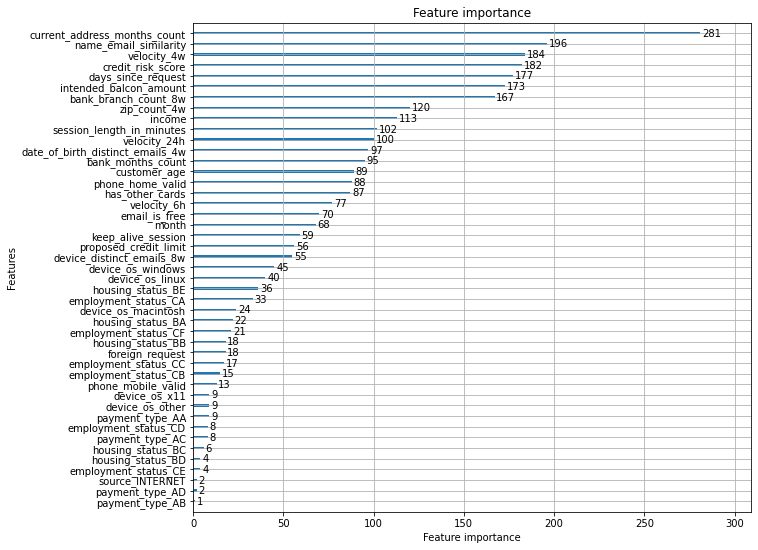

In [ ]:

plot_importance(lgbm_model, figsize=(10, 9));

In [ ]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94    247243
           1       0.07      0.69      0.13      2757

    accuracy                           0.90    250000
   macro avg       0.53      0.79      0.54    250000
weighted avg       0.99      0.90      0.94    250000



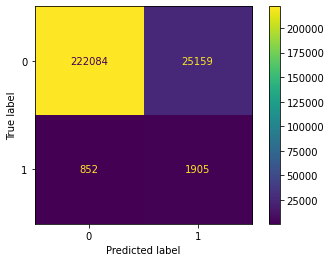

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=lgbm_model.classes_)
disp.plot()

In [ ]:
print(cm)

[[206164  41079]
 [   589   2168]]


In [ ]:
s=pd.DataFrame(y_test)

In [ ]:
y_test.value_counts()

0    247243
1      2757
Name: fraud_bool, dtype: int64